In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
def mesh_grid(x_start, x_end, y_start, y_end, N, grid_properties=False, plotting=False, width=10.0):
    '''
    Generate 2D mesh grid.
    - used by other flow functions.
    
    Parameters:
    -------------------
    x_start, x_end : float, boundaries in the x-direction
    y_start, y_end : float, boundaries in the y-direction
    N : int, number of points in each direction
    grid_properties : bool, if True retruns mesh properties, 
                    x_start,x_end,y_start,y_end,X,Y
    plotting : bool, plot the meshgrid, default is False
    width : float, width of the plot, default is 10.0
    
    Returns:
    --------------
    gridpoints : if True
    mesh_plot : if True 
    None
    '''
    
    x = np.linspace(x_start, x_end, N)    # creates a 1D-array with the x-coordinates
    y = np.linspace(y_start, y_end, N)    # creates a 1D-array with the y-coordinates
    
    X, Y = np.meshgrid(x, y)              # generates a mesh grid
    
    if plotting:
        height = (y_end - y_start) / (x_end - x_start) * width
        plt.figure(figsize=(width, height))
        plt.xlabel('x', fontsize=16)
        plt.ylabel('y', fontsize=16)
        plt.xlim(x_start, x_end)
        plt.ylim(y_start, y_end)
        plt.scatter(X, Y, s=5, color='#CD2305', marker='o')
    
    if grid_properties:
        return (x_start, x_end, y_start, y_end, X, Y, N)
    return None

In [3]:
# change mesh_properties as per requirement
mesh_properties = mesh_grid(-2.0,2.0,-1.0,1.0,50, grid_properties=True)

In [4]:
def get_velocity(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength / (2 * np.pi) * (X - xs) / ((X - xs)**2 + (Y - ys)**2)
    v = strength / (2 * np.pi) * (Y - ys) / ((X - xs)**2 + (Y - ys)**2)
    
    return u, v

In [5]:
def get_stream_function(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a source/sink.
    
    Parameters
    ----------
    strength: float
        Strength of the source/sink.
    xs: float
        x-coordinate of the source (or sink).
    ys: float
        y-coordinate of the source (or sink).
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (2 * np.pi) * np.arctan2((Y - ys), (X - xs))
    
    return psi

In [6]:
def Sink(strength_sink, x_sink, y_sink, mesh_properties):
    '''
    Sink Flow function.
    
    - uses get_velocity, get_stream_function, mesh_grid Functions
    
    Parameters:
    ----------------
    sink_strength : positive float, strength of the sink
    x_sink : float, x-coordinate of sink,
                must in inside the boundaries of meshgrid
    y_sink : float, y-coordiante of sink,
                must in inside the boundaries of meshgrid
    mesh_properties: Tuple, grid properties
    
    Returns:
    --------------
    u_sink, v_sink : velocity field
    psi_sink: stream-function
    '''
    
    # grid properties
    X = mesh_properties[-3]
    Y = mesh_properties[-2]
    
    # compute the velocity field
    u_sink, v_sink = get_velocity(strength_sink, x_sink, y_sink, X, Y)

    # compute the stream-function
    psi_sink = get_stream_function(strength_sink, x_sink, y_sink, X, Y)
    
    return u_sink, v_sink, psi_sink

In [7]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = +strength / (2 * math.pi) * (Y - yv) / ((X - xv)**2 + (Y - yv)**2)
    v = -strength / (2 * math.pi) * (X - xv) / ((X - xv)**2 + (Y - yv)**2)
    
    return u, v

In [8]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength / (4 * math.pi) * np.log((X - xv)**2 + (Y - yv)**2)
    
    return psi

In [9]:
def Vortex(strength_vortex, x_vortex, y_vortex, mesh_properties, width=10, get_data=False, plotting=True):
    '''
    Vortex Flow function.
    
    - uses get_velocity, get_stream_function, mesh_grid Functions
    
    Parameters:
    ----------------
    vortex_strength : positive float, strength of the vortex == gamma
    x_vortex : float, x-coordinate of vortex,
                must in inside the boundaries of meshgrid
    y_vortex : float, y-coordiante of vortex,
                must in inside the boundaries of meshgrid
    mesh_properties: Tuple, grid properties
    width: positive float, width of the plot, default=10.0
    get_data : bool, if True retruns u_vortex, v_vortex, psi_vortex
    plotting : bool, plot the meshgrid, default is True
    
    Returns:
    --------------
    vortex streamline plot
    u_vortex, v_vortex : velocity field
    psi_vortex: stream-function
    '''
    
    # gettng values from mesh_properties
    x_start, x_end, y_start, y_end, X, Y, N = mesh_properties
    
    # compute the velocity field
    u_vortex, v_vortex = get_velocity_vortex(strength_vortex, x_vortex, y_vortex, X, Y)

    # compute the stream-function
    psi_vortex = get_stream_function_vortex(strength_vortex, x_vortex, y_vortex, X, Y)
    
    if plotting :
        height = (y_end - y_start) / (x_end - x_start) * width
        plt.figure(figsize=(width, height))
        plt.xlabel('x', fontsize=16)
        plt.ylabel('y', fontsize=16)
        plt.xlim(x_start, x_end)
        plt.ylim(y_start, y_end)
        plt.streamplot(X, Y, u_vortex, v_vortex,
                          density=2, linewidth=1, arrowsize=1, arrowstyle='->')
        plt.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')
        
    if get_data:
        return u_vortex, v_vortex, psi_vortex
    return None

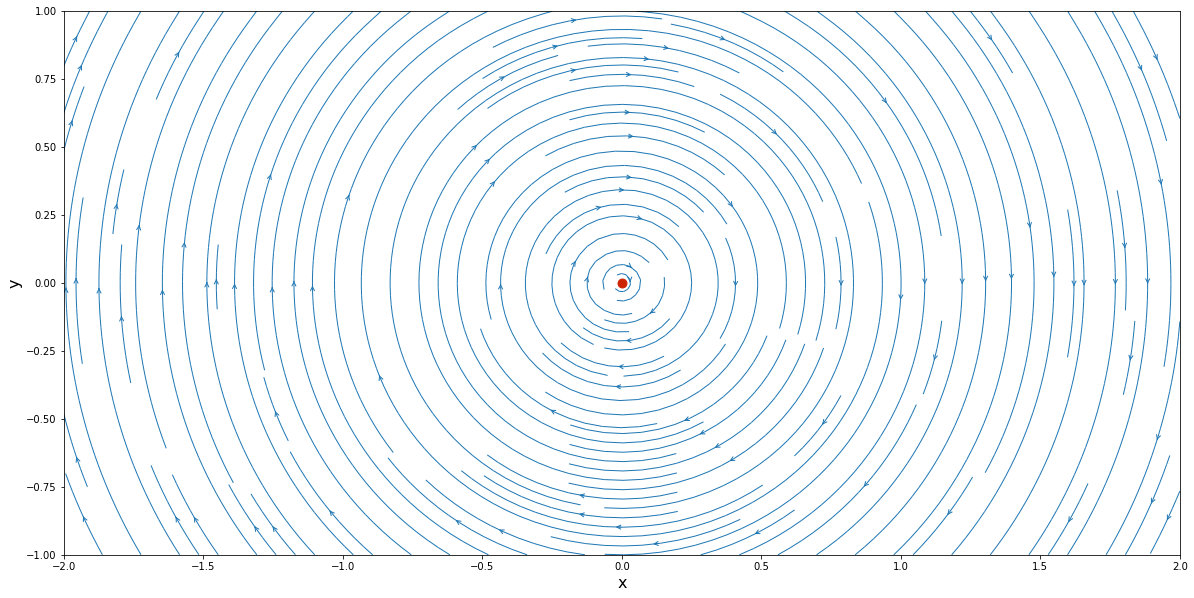

In [10]:
# Visualizing Vortex Flow
Vortex(5.0, 0.0, 0.0, mesh_properties, width=20)

In [11]:
# Vortex + Sink
def VortexSink(strength_vortex, strength_sink, x_vortex, y_vortex, x_sink, y_sink, mesh_properties, width=10, get_data=False,  plotting=True):
    '''
    Vortex + Sink FLow Function
    - usign superposition
    
    Parameters:
    ------------
    strength_vortex : positive float, strength of the vortex = gamma
    strength_sink : positive float, strength of the sink
    x_vortex : float, x-coordinate of vortex,
                must in inside the boundaries of meshgrid
    y_vortex : float, y-coordiante of vortex,
                must in inside the boundaries of meshgrid
    x_sink : float, x-coordinate of sink,
                must in inside the boundaries of meshgrid
    y_sink : float, y-coordiante of sink,
                must in inside the boundaries of meshgrid
    mesh_properties: Tuple, grid properties
    width: positive float, width of the plot, default=10.0
    get_data : bool, if True retruns u, v, psi
    plotting : bool, plot the meshgrid, default is True
    
    Returns:
    ------------
    plotting : if True returns Velocity Flow field plot for vortex + sink
    get_data : u, v, psi if True
    None
    '''
    
    # getting values form vortex and sink
    u_vortex, v_vortex, psi_vortex = Vortex(strength_vortex, x_vortex, y_vortex, mesh_properties, get_data=True, plotting=False)
    u_sink, v_sink, psi_sink = Sink(strength_sink, x_sink, y_sink, mesh_properties)
    
    # getting values from mesh_properties
    x_start, x_end, y_start, y_end, X, Y, N = mesh_properties
    
    # superposition of the vortex and sink
    u = u_vortex + u_sink
    v = v_vortex + v_sink
    psi = psi_vortex + psi_sink

    if plotting:
        height = (y_end - y_start) / (x_end - x_start) * width
        plt.figure(figsize=(width, height))
        plt.xlabel('x', fontsize=16)
        plt.ylabel('y', fontsize=16)
        plt.xlim(x_start, x_end)
        plt.ylim(y_start, y_end)
        plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
        plt.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o')
        
    if get_data:
        return u, v, psi
    return None

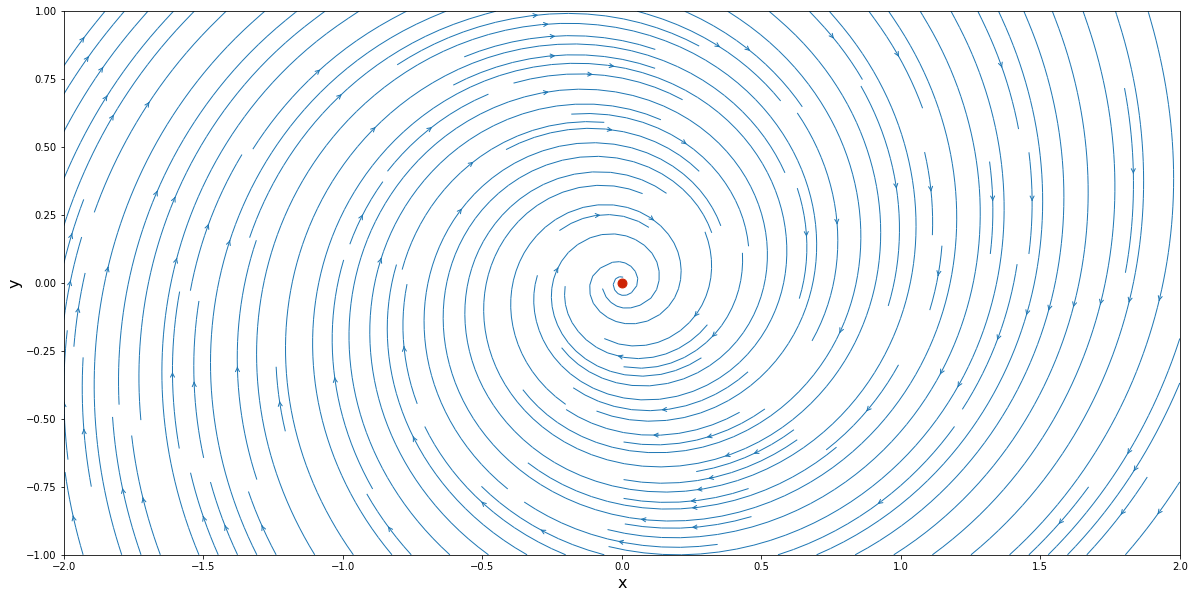

In [12]:
# Vortex + Sink   ==> Bath-tub VortexSink flow model
VortexSink(5.0, -1.0, 0.0, 0.0, 0.0, 0.0, mesh_properties, width=20)

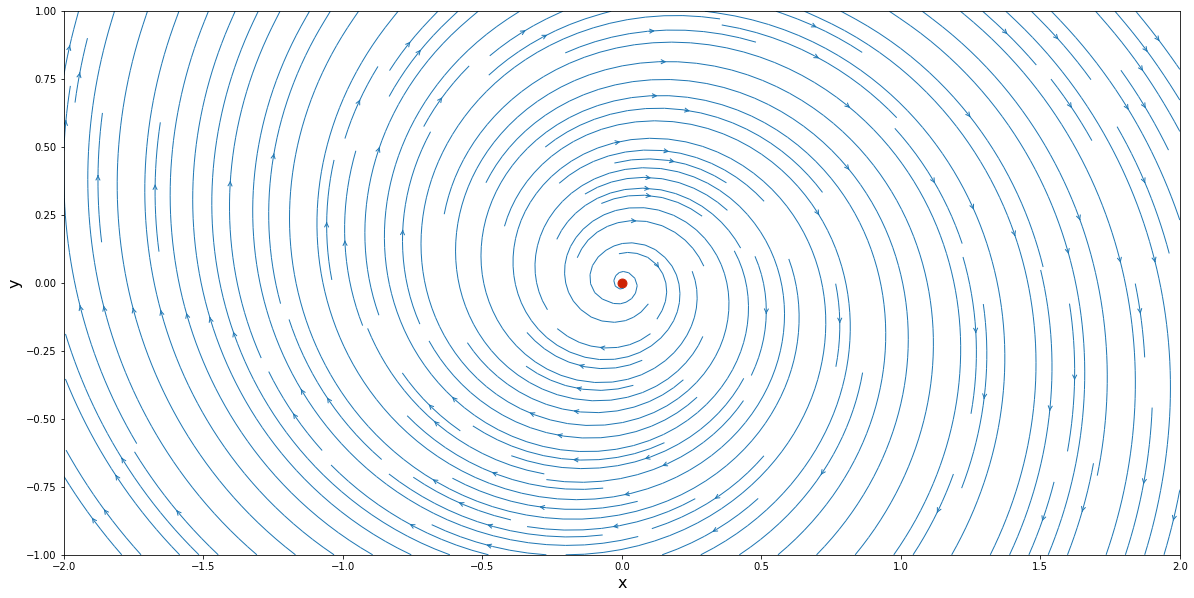

In [13]:
# Vortex + Source
VortexSink(5.0, 1.0, 0.0, 0.0, 0.0, 0.0, mesh_properties, width=20)